In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('iris.data.txt', header=None)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


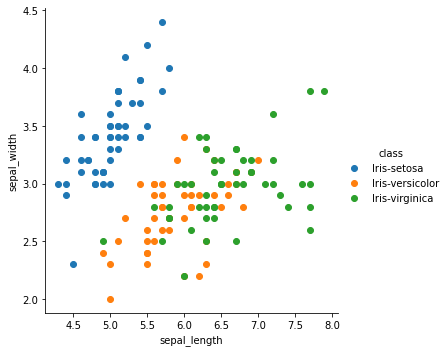

In [4]:
#класс Фейсгрид визуализирует взаимосвязь между неск переменными. позволяет выделять подмножества по: строкам, столбцам и оттенкам
#методу map() мы передали функцию plt.scatter, далее указали все аргументы, к-е передаются данной функции(width and lenght)
#легенда - окошко ,в котром показваается какой цвет на графике какому классу соотв
sns.FacetGrid(df, hue='class', height=5) \
.map(plt.scatter, 'sepal_length', 'sepal_width') \
.add_legend()
plt.show()

In [5]:
#один класс отделяется от остальных, а Versicolor и Virginica накладываются друг на друга
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#В предоставленном наборе данных нет пропусков.
#внаборе данных имеются 4 признака со значениями, обозначающими длину и ширину чашелистника и лепестка
#Также в данных есть категориальный признак-таргет, названный class, обозначающий, к какому классу относится цветок, позволяет преоьразовать их в числа
#Задание 2

In [7]:
df[df.duplicated(keep=False)]

,sepal_length,sepal_width,petal_length,petal_width,class
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


In [8]:
#Размер до:
df.shape

(150, 5)

In [9]:
df = df[~df.duplicated()]

In [10]:
#Размер после:
df.shape

(147, 5)

<AxesSubplot:xlabel='class', ylabel='Count'>

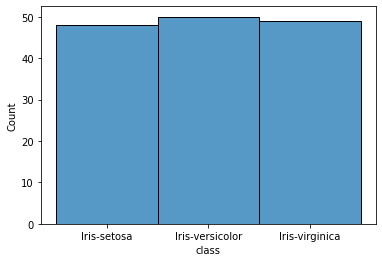

In [11]:
#Задание 3
sns.histplot(data=df, x='class')

In [12]:
#оценили сбалансир данных по классам, данные имеют равномерное распределение

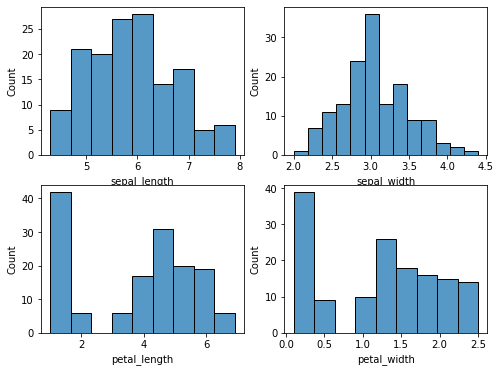

In [13]:
#Задание 4
#Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. 
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
for i in range(4):
    sns.histplot(data=df, x=df.columns[i], ax=ax[int(i / 2), int(i % 2)])

In [ ]:
#данные не имеют нормального распределения, в качестве способа масштабирования используем нормализацию(изменение диапазонов в данных без изменения формы распределения)

<AxesSubplot:>

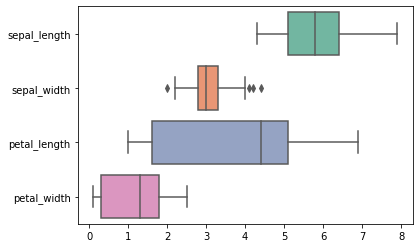

In [15]:
sns.boxplot(data=df, orient="h", palette="Set2")

In [16]:
df_norm = df.copy()

In [17]:
df_norm.iloc[:, :4] = MinMaxScaler().fit_transform(df.iloc[:, :4]) #преобр функ чтобы была в заданном диап. доступ по числ значению начиная от 0. фит транс подгоняет под данные, преобр.

In [18]:
df_norm.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa


<AxesSubplot:>

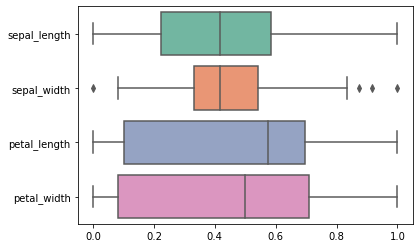

In [19]:
sns.boxplot(data=df_norm, orient="h", palette="Set2")

In [20]:
#Задание 5
#Так как из категориальных признаков в этом наборе данных есть только тагрет,
#то его соответственно нет смысла преобразовывать с помощью OHE, необходимо, чтоб остался один столбец с классами, но они просто имели числовые значения, 
#для возможности дальн работы. Поэтому единственный логичный вариант в данном случае - LabelEncoder

class_map = {name: i for i, name in enumerate(df_norm['class'].unique())}
class_map
#считаем класс мап

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [21]:
df_norm['class'] = df_norm['class'].map(class_map) 
#столбец класс меняется, туда вписываются значения относительно класс_мап

In [22]:
df_norm.sample(n=5, random_state=2)

,sepal_length,sepal_width,petal_length,petal_width,class
93,0.194444,0.125000,0.389831,0.375000,1
129,0.805556,0.416667,0.813559,0.625000,2
3,0.083333,0.458333,0.084746,0.041667,0
36,0.333333,0.625000,0.050847,0.041667,0
136,0.555556,0.583333,0.779661,0.958333,2


<AxesSubplot:>

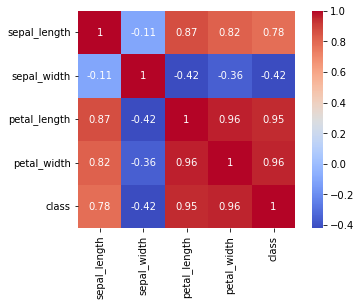

In [23]:
#Задание 6
sns.heatmap(df_norm.corr(), annot=True, square=True, cmap=plt.cm.coolwarm)

In [24]:
#наиболее сильно таргет коррелирует с признаками, характеризующими лепесток.

In [25]:
#Задание 7
df.isna().sum() #isna находит пропущ значения NaN

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [26]:
#В данных нет пропущенных значений

In [27]:
#Задание 8
#Нужно перемешать классы, чтоб они не шли по-порядку
df_norm = df_norm.sample(frac=1, random_state=1)
#разобьем выборку на обучающую и тестовую
#В функцию должны быть переданы как вектор признаков, так и целевой вектор (X и y).
#Для воспроизводимости вы должны установить аргумент random_state.
#Также необходимо определить test_size

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_norm.drop(columns=['petal_length', 'class']), 
                                                    df_norm.iloc[:, -1], stratify=df_norm.iloc[:, -1], 
                                                    test_size=0.33, random_state=17)
                                                    #задать пропорцию классов при разделении на обучающий и проверяющий датасеты с помощью параметра stratify функции train_test_split. 
                                                    #показывает какой обьем данных для тестового набора и случ генерация

In [29]:
X_train_tree, X_test_tree, y_train, y_test = train_test_split(df_norm.iloc[:, :4], df_norm.iloc[:, -1], 
                                                              stratify=df_norm.iloc[:, -1], 
                                                              test_size=0.33, random_state=17)
                                                              #разделяем весь набор данных один раз для выделения обучающей выборки. 
                                                              #Затем еще раз, чтобы разбить оставшиеся данные на датасеты для тестирования и валидации.

In [30]:
ohe = OneHotEncoder()
y_test = ohe.fit_transform(y_test.values.reshape(-1, 1)).toarray() #устанавливаем ohe в y_test, затем преобраз y_test

In [31]:
rev_class_map = {v:i for i, v in class_map.items()} #распознавание классов, импорт пакетов 

In [32]:
def plot_roc_auc(y_test, y_score):
    #Вычислить кривую ROC и площадь ROC для каждого класса
    #dict создает словарь
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    #range звдает диапазон, начинающийся с 0 и включающий целые числа меньше 3
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    #Точность метрик могут быть "усреднены" след способами:
    #При микро-усреднении характеристики усредняются по всем классам, а затем вычисляется итоговая метрика точность, полнота
    #При макро-усреднении сначала вычисляется итоговая метрика для каждого класса, а затем результаты усредняются по всем классам
    #Средняя точность для каждого класса отличается от микросредней точности. Классы должны быть сбалансированы. Если в каком-то классе мало/много данных, тестовая статистика будет ненадёжной
    #результирующая точность и полнота классификатора рассчитывается как арифметическое среднее его точности по всем классам
    
    #вычислить микросред кривую рок и площадь
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    #сначала соберираем все ложноположительные показатели
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

    #интерполируем все кривые рок в этих точках
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(3):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    #усредняем и вычисляем AUC. 
    mean_tpr /= 3

    #вычислить макросред кривую рок и площадь
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    #строим ROC кривые
    fig, ax = plt.subplots(2, 1, figsize=(10, 12))

    ax[0].plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             linewidth=2)

    ax[0].plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             linewidth=2)

    for i in range(3):
        ax[1].plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                       ''.format(rev_class_map[i], roc_auc[i]))

    ax[0].plot([0, 1], [0, 1], 'k--')
    ax[0].set_xlim([0.0, 1.0])
    ax[0].set_ylim([0.0, 1.05])
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title('Micro and macro averaging metrics ROC curves')
    ax[0].legend(loc="lower right")

    ax[1].plot([0, 1], [0, 1], 'k--')
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title('ROC curves for each class')
    ax[1].legend(loc="lower right")
    plt.show()

In [33]:
def plot_pr(y_test, y_score):
    precision = dict()
    recall = dict()
    AP = dict()
    for i in range(3):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
        AP[i] = average_precision_score(y_test[:, i], y_score[:, i])

    #вычисляем микросреднюю кривую PR и PR площадь
    precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(), y_score.ravel())
    AP["micro"] = average_precision_score(y_test.ravel(), y_score.ravel())


    #построить кривые пр для мультиклассовой задачи

    #вычисляем макросреднюю кривую PR и PR площадь

    #сначала агрегируем все ложные срабатывания
    all_precision = np.unique(np.concatenate([precision[i] for i in range(3)]))

    #затем интерполируем все PR curves в этой точке
    mean_recall = np.zeros_like(all_precision)
    for i in range(3):
        mean_recall += np.interp(all_precision, precision[i], recall[i])

    # усредняем и вычисляем AUC
    mean_recall /= 3

    precision["macro"] = all_precision
    recall["macro"] = mean_recall
    AP["macro"] = average_precision_score(y_test, y_score) #средняя точность

    #строим все PR curves
    fig, ax = plt.subplots(2, 1, figsize=(10, 12))
    
    ax[0].plot(recall["micro"], precision["micro"],
             label='micro-average PR curve (AP = {0:0.2f})'
                   ''.format(AP["micro"]),
             linewidth=2)
    ax[0].plot(recall["macro"], precision["macro"],
             label='macro-average PR curve (AP = {0:0.2f})'
                   ''.format(AP["macro"]),
             linewidth=2)

    for i in range(3):
        ax[1].plot(recall[i], precision[i], label='PR curve of class {0} (AP = {1:0.2f})'
                                       ''.format(rev_class_map[i], AP[i]))

    ax[0].set_xlim([0.0, 1.0])
    ax[0].set_ylim([0.0, 1.05])
    ax[0].set_xlabel('recall')
    ax[0].set_ylabel('precision')
    ax[0].set_title('Micro and macro averaging metrics PR curves')
    ax[0].legend(loc="lower right")

    ax[1].set_xlim([0.0, 1.00])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_xlabel('recall')
    ax[1].set_ylabel('precision')
    ax[1].set_title('PR curves for each class')
    ax[1].legend(loc="lower right")
    plt.show()

In [34]:
#KNN
#По умолчанию для мультиклассовой классификации в KNN используется One vs All подоход. Для каждого класса мы принимаем его как положительный класс, а остальные классы группируем вместе как отрицательный класс
knn_params = {
    'n_neighbors': list(range(5, 31, 5)),
    'p': list(range(1, 4)),
    'weights': ['uniform', 'distance'],
}
knn = KNeighborsClassifier()

In [35]:
#оптимальное занчение параметра
grid_knn = GridSearchCV(knn, cv=5, param_grid=knn_params, scoring='roc_auc_ovr')

In [36]:
grid_knn.fit(X_train, y_train)
#estimator Оценщик, который был выбран поиском
#param Настройка параметров, дающая наилучшие результаты
#scoring перекрестная оценка estimator

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 15, 20, 25, 30], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc_ovr')

In [37]:
grid_knn.best_estimator_ 
#Оценщик, который был выбран поиском, т.е. оценщик, который дал самый высокий балл (или наименьший убыток, если указан) по пропущенным данным

KNeighborsClassifier(weights='distance')

In [38]:
y_score_knn=ohe.transform(grid_knn.best_estimator_.predict(X_test).reshape(-1, 1)).toarray() 
#Средняя перекрестная оценка best_estimator

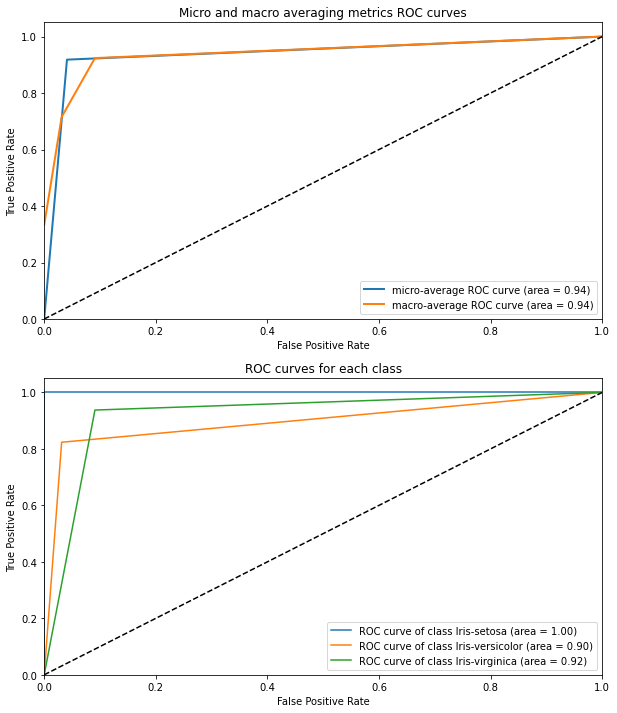

In [39]:
plot_roc_auc(y_test, y_score_knn)
#точность - как часто классиф-р делает правиль выбор. полнота - ск обьектов опр класса находит классификатор

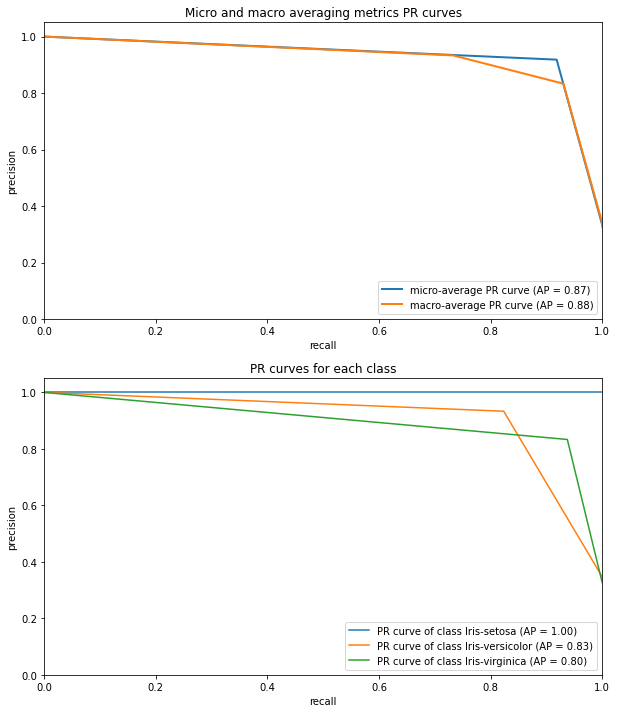

In [40]:
plot_pr(y_test, y_score_knn)

In [41]:
#Как было замечено ранее, класс setosa отделяется от других, когда оставшиеся 2 накладываются друг на друга

In [42]:
#DecisionTree - пространство разделяется с помощью набора условий, и результирующая структура является деревом, на листьях- к какому классу отн набор обьектов
#По умолчанию для мультиклассовой классификации в дереве решений используется One vs All подоход
tree_params = {
    'max_depth': list(range(3, 8, 2)), #макс глубина дерева. узлы расширяются пока все листья не будут содержать меньше образцов чем ниже
    'min_samples_leaf': list(range(1, 6)), #мин колво образцов для разделения узла
    'criterion': ['gini', 'entropy'], #параметр для измерения качества разделения
    #джини измеряет частоту, с которой любой элемент набора данных будет неправильно помечен при случайной метке.
    #Энтропия- мера информации, которая указывает на беспорядок признаков.Узел чист, когда энтропия имеет свое минимальное значение, которое равно 0(все содержащиеся в узле элементы принадлежат к одному уникальному классу)
}
tree = DecisionTreeClassifier()

In [43]:
grid_tree = GridSearchCV(tree, cv=5, param_grid=tree_params, scoring='roc_auc_ovr') 
#cv позв изм колво сгибов для перекрестной пр

In [44]:
grid_tree.fit(X_train_tree, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'min_samples_leaf': [1, 2, 3, 4, 5]},
             scoring='roc_auc_ovr')

In [45]:
grid_tree.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [46]:
y_score_tree = ohe.transform(grid_tree.best_estimator_.predict(X_test_tree).reshape(-1, 1)).toarray()

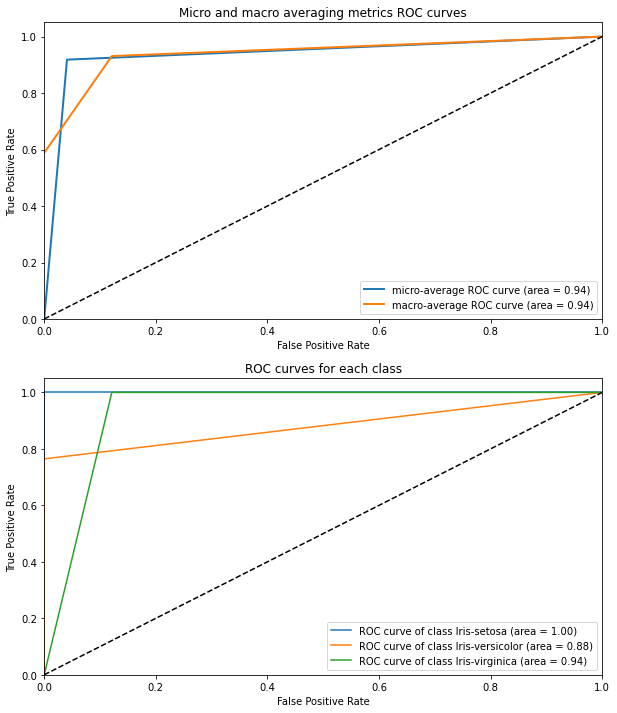

In [47]:
plot_roc_auc(y_test, y_score_tree)

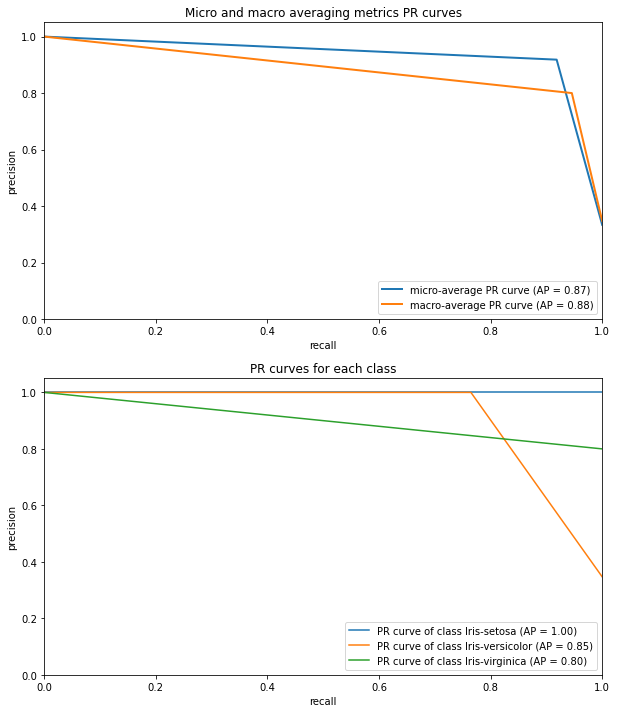

In [48]:
plot_pr(y_test, y_score_tree)

In [49]:
#Вывод: дерево решений показало результат лучше, чем k ближайших соседей